# Feature Selection

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

In [5]:
# Import Cleaned Dataset
df = pd.read_csv('../Datasets/career_avgs.csv')
df.head()

,PLAYER_ID,GP,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT,PLAYER_NAME
0,1630173,394,5.8,1.0,0.6,0.7,1.0,7.6,0.488,0.297,0.608,Precious Achiuwa
1,203500,769,8.0,1.5,0.8,0.9,1.4,8.8,0.586,0.059,0.535,Steven Adams
2,1628389,573,8.9,3.6,1.1,0.9,2.2,15.8,0.535,0.317,0.758,Bam Adebayo
3,1630534,286,2.8,1.2,0.6,0.5,0.8,7.2,0.440,0.336,0.713,Ochai Agbaji
4,1630583,242,5.3,1.9,0.6,0.6,0.9,9.8,0.458,0.344,0.684,Santi Aldama


5.014745321394485
2.6926246830223532
0.12755977403084376
0.17184101852910014
0.5554011755585139
32.59644688520236
0.007489180222178139
0.008648295183996688
0.011713417063137754


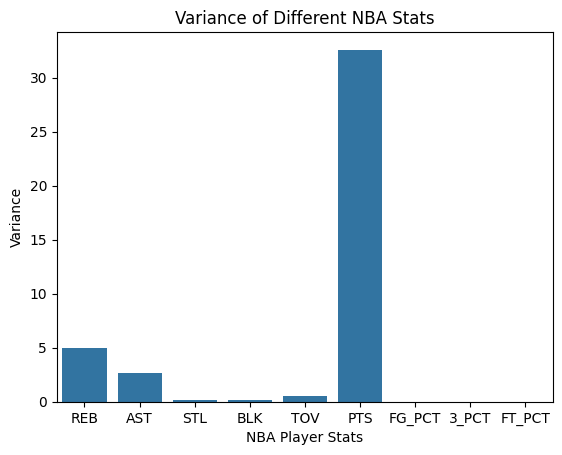

In [6]:
# Feature Selection using Variance Threshold
numeric_data = df.loc[:, "REB": "FT_PCT"]
variance_array = np.empty(numeric_data.shape[1])

for i in range(numeric_data.shape[1]):
    variance_array[i] = np.var(numeric_data.iloc[:, i])
    print(variance_array[i])

sns.barplot(x= numeric_data.columns, y= variance_array)
plt.xlabel('NBA Player Stats')
plt.ylabel('Variance')
plt.title('Variance of Different NBA Stats')
plt.show()

In [7]:
# Scaling the Features using standardization

scaler = StandardScaler().fit(df.loc[:, "REB": "FT_PCT"])
np_standardized = scaler.fit_transform(df.loc[:, "REB": "FT_PCT"])
np_standardized_df = pd.DataFrame(data= np_standardized, columns= df.loc[:, "REB": "FT_PCT"].columns).fillna(0)
np_standardized_df.head()

,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT
0,0.950324,-0.602345,-0.143686,0.669008,-0.143380,-0.236932,0.365784,-0.198159,-1.327828
1,1.932746,-0.297638,0.416295,1.151474,0.393351,-0.026750,1.498207,-2.757403,-2.002327
2,2.334646,0.982130,1.256266,1.151474,1.466813,1.199313,0.908885,0.016903,0.058128
3,-0.389343,-0.480462,-0.143686,0.186542,-0.411745,-0.306993,-0.188873,0.221213,-0.357659
4,0.727046,-0.053873,-0.143686,0.427775,-0.277563,0.148402,0.019123,0.307238,-0.625611


Text(0.5, 1.0, 'Principal Component Analysis')

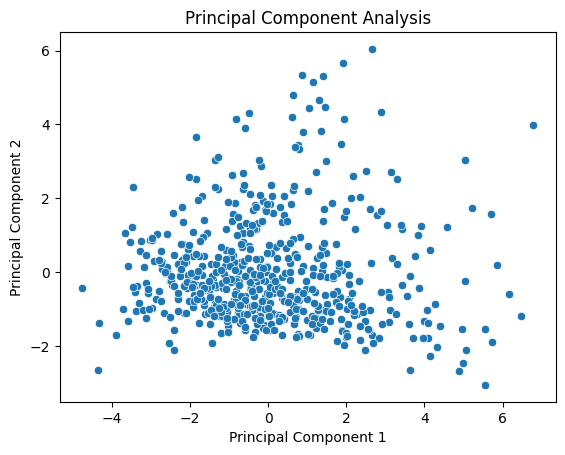

In [8]:
# Performing PCA
pca = PCA(n_components=2)

principal_components = pca.fit_transform(np_standardized_df)

principal_df = pd.DataFrame(data= principal_components, columns= ['Principal Component 1', 'Principal Component 2'])

principal_df

sns.scatterplot(x= 'Principal Component 1', y= 'Principal Component 2', data = principal_df)
plt.title('Principal Component Analysis')

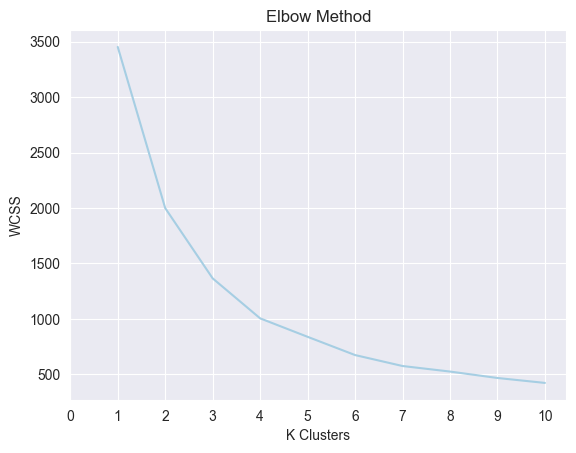

In [10]:
# Performing the Elbow Method to determine the best number of clusters

WCSS = []
for i in range(1,11):
    kmeans= KMeans(n_clusters= i)
    kmeans.fit_transform(principal_df)
    WCSS.append(kmeans.inertia_)

sns.set_style('darkgrid')
sns.set_palette('Paired')
plt.plot(range(1,11), WCSS)
plt.xticks(np.arange(0,11,1))
plt.ylabel('WCSS')
plt.xlabel('K Clusters')
plt.title('Elbow Method')
plt.show()


In [ ]:
# K Means Clustering

kmeans = KMeans(n_clusters = 5, init= 'k-means++', random_state= 42332)
kmeans.fit_transform(principal_df)

array([[4.06249318, 2.33358267, 0.44274538, 2.87535005, 2.5622776 ],
       [5.13674623, 4.50831469, 2.51508521, 5.10402099, 1.19863365],
       [2.0287298 , 3.78601284, 3.98107848, 5.77560775, 2.54609162],
       ...,
       [3.8283503 , 0.85559118, 2.61112035, 1.5617338 , 4.92597507],
       [4.86576594, 1.85041717, 2.58318004, 0.49075381, 5.30998811],
       [2.82446774, 0.20795011, 2.42876968, 2.47494988, 4.1658991 ]],
      shape=(569, 5))

In [ ]:
clustered_df = df.copy()
clustered_df['Clusters'] = kmeans.labels_
clustered_df_group = clustered_df.drop(['PLAYER_ID', 'GP', 'PLAYER_NAME'], axis = 1).groupby('Clusters').mean().round(3)
clustered_df_group.head()

,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT
Clusters,,,,,,,,,
0,5.334,4.743,1.100,0.487,2.356,18.006,0.463,0.351,0.798
1,3.304,2.104,0.746,0.314,1.111,9.258,0.441,0.354,0.791
2,4.553,0.941,0.485,0.687,0.780,6.539,0.545,0.261,0.674
3,1.661,0.773,0.325,0.148,0.437,3.602,0.402,0.291,0.728
4,8.284,1.779,0.747,1.479,1.474,12.376,0.577,0.214,0.676


In [ ]:
# Naming the Clusters
cluster_meaning = { 0 : "Scoring Shot Creator", 1 : "3 and D Wing", 2 : "Interior Role Player", 3 : "Energetic Role Player", 4 : "Defensive Anchor Big" } 
clustered_df['Clusters'] = clustered_df['Clusters'].replace(cluster_meaning)
clustered_df[['Principal Component 1', 'Principal Component 2']] = principal_df
clustered_df.head()

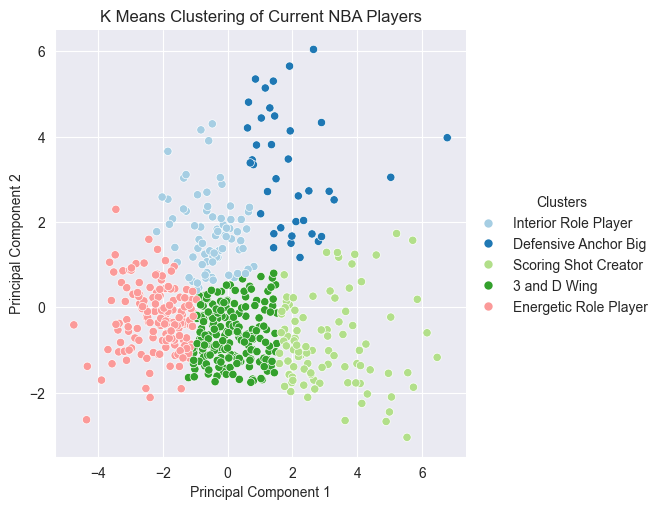

In [125]:
sns.set_style('darkgrid')
sns.set_palette('Paired')
sns.relplot(x= 'Principal Component 1', y= 'Principal Component 2',  data= principal_df, hue = clustered_df['Clusters'])
plt.title('K Means Clustering of Current NBA Players')
plt.show()

In [ ]:
# K Nearest Neighbors
KNN = NearestNeighbors(n_neighbors = 6, metric='euclidean')
KNN.fit(clustered_df[['Principal Component 1', 'Principal Component 2']])
player_coords = clustered_df.loc[clustered_df['PLAYER_NAME'] == 'Stephen Curry'][['Principal Component 1', 'Principal Component 2']]
distances, indices = KNN.kneighbors(player_coords)
selected_df = clustered_df.iloc[indices[0]].reset_index().drop(0)
selected_df.head()

,index,PLAYER_ID,GP,REB,AST,STL,BLK,TOV,PTS,FG_PCT,3_PCT,FT_PCT,PLAYER_NAME,Clusters,Principal Component 1,Principal Component 2
1,385,101108,1359,4.4,9.2,2.0,0.2,2.3,16.9,0.469,0.370,0.871,Chris Paul,Scoring Shot Creator,4.890880,-2.674348
2,19,1630163,237,6.0,7.5,1.5,0.3,3.3,21.1,0.422,0.364,0.836,LaMelo Ball,Scoring Shot Creator,5.054927,-2.101182
3,188,1630169,410,3.7,8.7,1.5,0.6,2.2,17.1,0.476,0.395,0.853,Tyrese Haliburton,Scoring Shot Creator,4.312034,-2.030074
4,564,1629027,488,3.5,9.8,1.0,0.2,4.2,25.2,0.432,0.351,0.873,Trae Young,Scoring Shot Creator,5.534934,-3.046084
5,297,203081,900,4.3,6.7,1.0,0.3,2.8,25.1,0.439,0.371,0.899,Damian Lillard,Scoring Shot Creator,4.140005,-2.251221
